![GMIT_Logo.png](GMIT-logo.png)

# <div align="center"> Programming For Data Analytics <div> 
## <div align="center"> Project 2020<div> 

***

## <u>Problem statement<u>

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the `numpy.random` package for this purpose. Specifically, in this project you should:

- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

***

### <div align="center"> The Correlation between Obesity and Severity of Covid-19<div>

The first human cases of Covid-19 were recorded in the Chinese city of Wuhan in December 2019. Since then the disease has escalated to th level of pandemic with over 80 million confirmed cases worldwide [][] 

Covid-19 is the disease caused by a strain of coronavirus known as Serve Acute Respiratory Syndrome Coronavirus, commonly referred to as SARS-CoV-2. This highly contagious, respiratory illness has a number of symptoms, the most common of which included: fever, sore throat and fatigue []. The severity of Covid-19 ranges from most cases reporting mild symptoms to very severe or even fatal for those in high risk categories. Given the risks involved, predicting the likelihood of death for an individual who contracts Covid-19 could help to avoid such an outcome.  
To predict the severity of Covid-19 in an individual we will need to understand the factors that contribute to susceptability. There are a number of underlying conditions that have shown significant correlation with severity of Covid-19. One such notable condition is Obesity. [6] Obesity is the excessive accumulation of body fat, adipose tissue, that typically leads to a variety of health risks. Obesity contributes to multiple systemic complications and directly causes the mechanical impairment of vital organs as a result of the accumulation of adipose tissue around these organs. Obesity also significantly interferes with respiratory function by decreasing lung volume, particularly the expiratory reserve volume and functional residual capacity. Because of the ineffectiveness of the respiratory muscles, strength and resistance may be reduced. All these factors lead to inspiratory overload, which increases respiratory effort, oxygen consumption, and respiratory energy expenditure. It is noteworthy that patterns of body fat distribution significantly influence the function of the respiratory system, likely via the direct mechanical effect of fat accumulation in the chest and abdominal regions. Weight loss caused by various types of treatment, including low-calorie diet, intragastric balloon, and bariatric surgery, significantly improves lung function and metabolic syndrome and reduces body mass index. [1]

An individual is considered to be obese if they have a body mass index (BMI) of 30 or greater. BMI, which is used as an indicator of high body fatness, is calculated by dividing a person's weight in kilograms by the square of that person's height in meters.

Given the impact obesity has on the respiratory system it is relevenant to investigate the correlation between obesity and susceptability to serve symptoms of Covid-19. Covid 19 is a respiratiory illness caused by the SARS-CoV-2 ( Severe acute respiratory syndrome coronavirus 2) strain of the coronavirus. [2]

The Case Fatality Rate (CFR) is an indictation of this likelihood [4]. In Ireland, the CFR is close to 3% [5]. Understanding the factors the influence the severity of symptoms will help to reduce this CFR. 

Developing a predictive model for the servity of Covid-19 is will be key to reducing the CFR. For the purpose of this project, I hope to develop a rudimentary model for predicting severity of Covid-19 based on one particular risk factor, Obesity. The inspiration for this project came from two studies;

- https://www.drugtargetreview.com/article/77332/predicting-covid-19-susceptibility-and-severity/#:~:text=Known%20risk%20factors%20for%20severe,older%20age%20and%20male%20sex.

- https://hselibrary.ie/what-is-the-risk-of-a-person-with-obesity-contracting-covid-19-compared-to-someone-without-obesity-what-is-the-risk-of-a-person-with-obesity-developing-severe-illness-from-covid-19-how-is-severe-ill/#Rottoli


[1] https://www.worldometers.info/coronavirus/

[2] https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200423-sitrep-94-covid-19.pdf?sfvrsn=b8304bf0_4

[3] https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/coronavirus-disease-covid-19#:~:text=symptoms

[5] https://www.cebm.net/covid-19/global-covid-19-case-fatality-rates/

[4] https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19

[6] https://www.accessscience.com/content/the-relationship-between-obesity-and-covid-19/BR1002201

https://ourworldindata.org/coronavirus/country/ireland?country=~IRL

https://covid19ireland-geohive.hub.arcgis.com/

### TO DO

- create uuids and set as index 
https://towardsdatascience.com/generating-product-usage-data-from-scratch-with-pandas-319487590c6d
- define numerical and categorical variables in explaination
- create a function to call dataset.

## <u>Creating My Variables<u>
    


This dataset shall have a sample size of 1000 male and females between the ages of 18-24. Each subject tested positive for Coronavirus and their serverity of symptoms were recorded along with the following physical properties: 

- Age 
- Sex
- Height 
- Weight 
- BMI 
- Weight Category
- Symptoms.

Meaning of symptoms 

Weight meanings

#### Sex
To simualte an accurate sample of the irish population we shall have an even distribution of men and women.

https://en.wikipedia.org/wiki/Demographics_of_the_Republic_of_Ireland

https://www.thejournal.ie/population-ireland-3328974-Apr2017/#:~:text=The%20figures%2C%20released%20by%20the,males%20for%20every%20100%20females.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

rng = np.random.default_rng()
#s = ['male', 'female']
sex = rng.choice(['male', 'female'], 1000, p=[0.5, 0.5])

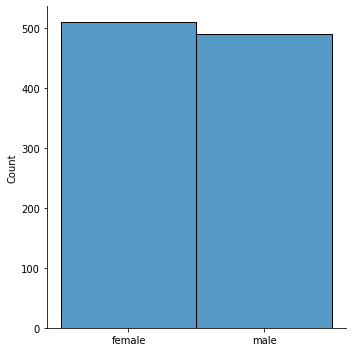

In [39]:
sns.displot(sex, discrete=True)

In [23]:
# Need to covert sex to a categorical data type
# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
sex = pd.Series(sex, dtype="category")
sex.describe()

count       1000
unique         2
top       female
freq         505
dtype: object

#### Age

To rule out any age dependant susceptabilities to the serve symptoms of Covid-19, all our sample individuals shall be between the ages of 18-24, which has been shown to be the demographic with the lowest instances of fatality due to Covid-19 [3][4]

https://arxiv.org/abs/2005.07180v1

https://www.nature.com/articles/s41598-020-73777-8

https://www.youtube.com/watch?v=t-Ci3FosqZs

In [24]:
size = 1000
age = rng.integers(18,25,size)

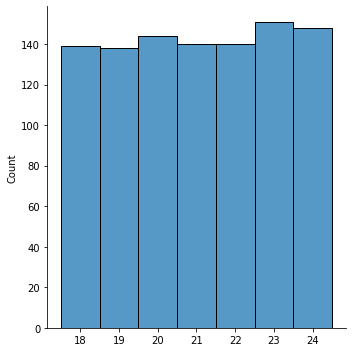

In [25]:
sns.displot(age, x = age, discrete=True)

In [27]:
# covert the age parameter into pandas series so we can easily investigate it 
age = pd.Series(age)
age.describe()

count    1000.000000
mean       21.049000
std         2.006146
min        18.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        24.000000
dtype: float64

#### Height 

The average male height in Ireland is 179 with a standard deviation of 7cm and 165cm for females with a standard deviation of 7.6cm

[][]
[] https://en.wikipedia.org/wiki/Average_human_height_by_country#Table_of_heights (height)

[] https://econ-papers.upf.edu/papers/1002.pdf (s.d of height)

In [32]:
df = pd.DataFrame()
df['Sex'] = sex
df['Height'] = 0

for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Height"][i]=rng.normal(179,7)
    else:
        df["Height"][i]=rng.normal(165,7.6)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


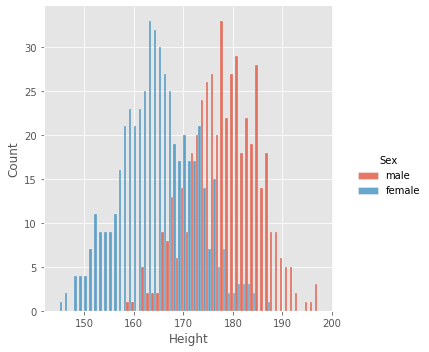

In [8]:
sns.displot(df, x = "Height", hue="Sex", discrete=True, multiple="dodge")

In [35]:
df['Height'].describe()

count    1000.00000
mean      171.41800
std        10.26463
min       142.00000
25%       164.00000
50%       172.00000
75%       179.00000
max       201.00000
Name: Height, dtype: float64

#### Weight

The average weight in Ireland for a men is 89kg with a deviation of 10kg. The average for women is 73kg with a deviation of 10kg. 

include a skewed distribution 

In [36]:
df['Weight'] = 0
for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Weight"][i]=rng.normal(89,10)
    else:
        df["Weight"][i]=rng.normal(73,7.10)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


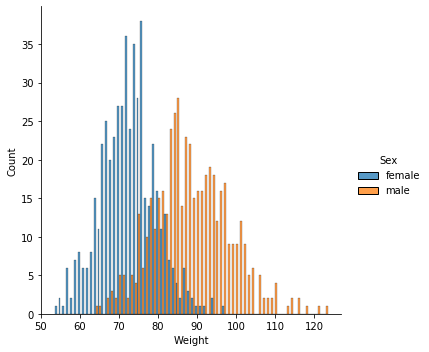

In [37]:
sns.displot(df, x = "Weight", hue="Sex", discrete=True, multiple="dodge")

#### BMI
Body Mass Index is used as an indicator of high body fatness. It is calculated by dividing a person's weight in kilograms by the square of that person's height in meters.

#### Weight Category
Weight category is the categorical classification of BMI: 
- 18-25	Normal
- 25-30	Overweight
- 30-35	Obese	
- 35+	Severely Obese

#### Symptoms 
Symptoms is the categorical variable relating to severity of Covid-19 symptoms experienced by the subject:
- Mild:        Mild symptoms lasting a few days and subject was able to recover on their own.
- Moderate:    Symptoms persisted for over a week and required medical help.
- Severe:      Subject experienced serious complications and required hospitalization. Continues to need care. 
- Very Severe: Subject experienced serious complication resulting in death

***

### Create Dataset 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
rng = np.random.default_rng()

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,8)

size = 1000
age = rng.integers(18,25,size)
sex = rng.choice(['Male', 'Female'], 1000, p=[0.5, 0.5])

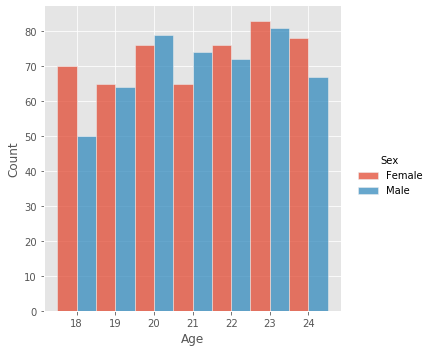

In [96]:
df = pd.DataFrame()
df['Age'] = pd.Series(age)
df['Sex'] = pd.Series(sex)

sns.displot(df, x = "Age", hue="Sex", discrete=True, multiple="dodge")

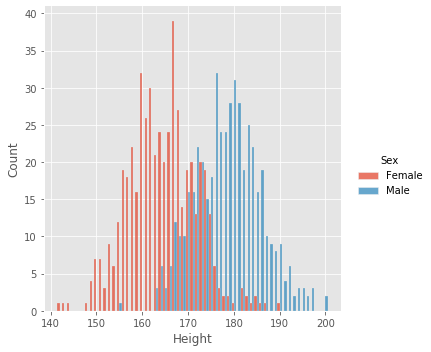

In [97]:
df['Height'] = 0

for i in range(len(df)):
    if df["Sex"][i]=="Male":
        df["Height"][i]=rng.normal(179,7)
    else:
        df["Height"][i]=rng.normal(165,7.6)

sns.displot(df, x = "Height", hue="Sex", discrete=True, multiple="dodge")

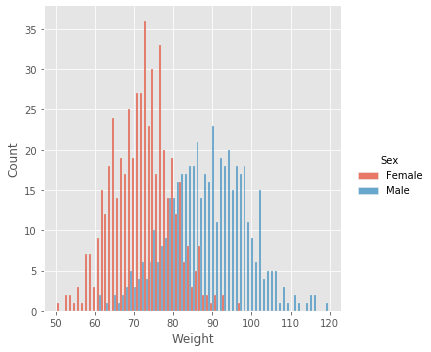

In [98]:
df['Weight'] = 0

for i in range(len(df)):
    if df["Sex"][i]=="Male":
        df["Weight"][i]=rng.normal(89,10)
    else:
        df["Weight"][i]=rng.normal(73,7.10)

sns.displot(df, x = "Weight", hue="Sex", discrete=True, multiple="dodge")

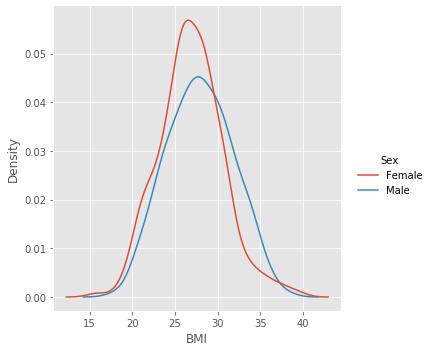

In [99]:
df['BMI'] = df['Weight']/(((df['Height'])/100)**2)

sns.displot(df, x = "BMI", hue="Sex", kind="kde")
# talk about bias toward overweight in data which is a reflection of ireland 

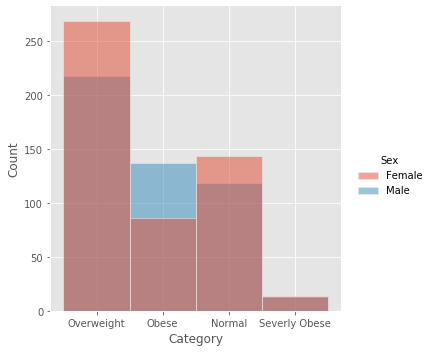

In [106]:
df['Category'] = 0

for i in range(len(df)):
    if df["BMI"][i]<=25:
        df["Category"][i]= 'Normal'
    elif df["BMI"][i]<=30:
        df["Category"][i]= 'Overweight'
    elif df["BMI"][i]<=35:
        df["Category"][i]= 'Obese'
    elif df["BMI"][i]>35:
        df["Category"][i]= 'Severly Obese'
        
sns.displot(df, x = df['Category'], hue = 'Sex')

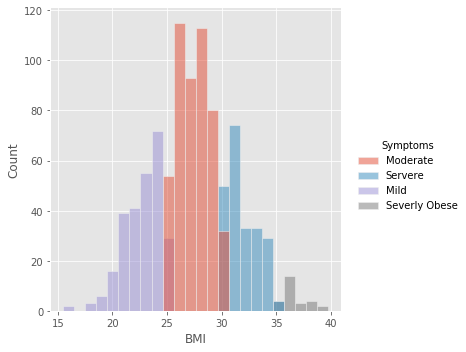

In [109]:
df['Symptoms'] = 0        
       
for i in range(len(df)):
    if df["Category"][i]=='Normal':
        df["Symptoms"][i] = 'Mild'
    elif df["Category"][i] =='Overweight':
        df["Symptoms"][i] = 'Moderate'
    elif df["Category"][i] =='Obese':
        df["Symptoms"][i] = 'Servere'
   # elif df["Category"][i] =='':
    else:
        df["Symptoms"][i] = 'Severly Obese'
        
sns.displot(df, x = df['BMI'], hue = 'Symptoms')

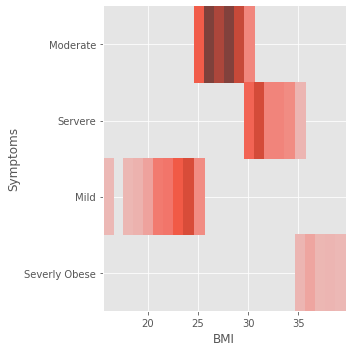

In [115]:
sns.displot(df, x = df['BMI'], y = 'Symptoms')

In [111]:
# change the order of the legend 

In [77]:
df.head()

,Age,Sex,Height,Weight,BMI,Category,Symptoms
0,24,Male,167,63,22.589551,Normal,Mild
1,21,Male,171,68,23.255019,Normal,Mild
2,19,Female,182,72,21.736505,Normal,Mild
3,18,Female,165,63,23.140496,Normal,Mild
4,21,Male,168,76,26.927438,Overweight,Moderate


In [117]:
df.tail()

,Age,Sex,Height,Weight,BMI,Category,Symptoms
995,22,Male,167,90,32.270788,Obese,Servere
996,23,Male,190,86,23.822715,Normal,Mild
997,19,Female,159,73,28.875440,Overweight,Moderate
998,23,Female,167,60,21.513859,Normal,Mild
999,18,Female,170,82,28.373702,Overweight,Moderate


In [78]:
df.describe()

,Age,Height,Weight,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.902000,164.271000,72.248000,26.935646
std,1.955561,7.431338,6.976185,3.564498
min,18.000000,138.000000,51.000000,17.040329
25%,19.000000,159.000000,68.000000,24.447279
50%,21.000000,164.000000,72.000000,26.726400
75%,23.000000,169.000000,77.000000,29.136316
max,24.000000,186.000000,94.000000,40.175310


In [112]:
df2 = df[['Sex','Height','Weight','BMI','Category','Symptoms']]

In [113]:
df2['Sex'].replace({'Male':'1', 'Female':'2'}

SyntaxError: unexpected EOF while parsing (<ipython-input-113-842ae93f4177>, line 1)

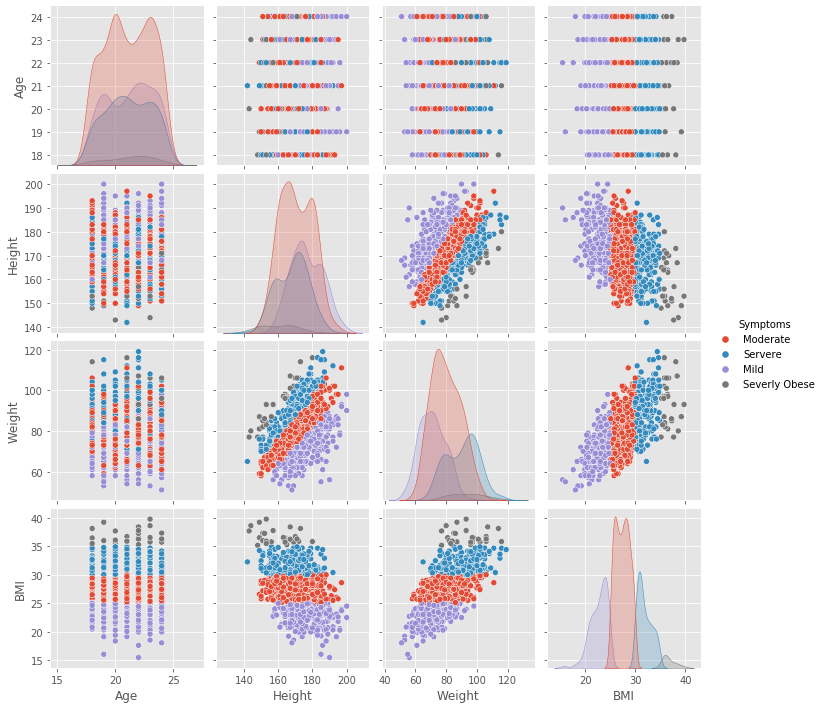

In [114]:
sns.pairplot(df, hue ='Symptoms')
# age parameter is making the data look strange because it is not continuous

In [1]:

#plt.style.use('seaborn-poster') #sets the size of the charts
# style.use('ggplot')

# create a function for sex 
# https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
# []https://realpython.com/ggplot-python/

In [3]:
#pd.melt(df, id_vars=['ID'], value_vars=['Age'])

In [25]:

        #df["Symptoms"][i]= 'very servere'
    
    #[] https://stackoverflow.com/questions/20308588/is-there-a-greater-than-but-less-than-function-in-python

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Shane/opt/anacond

need to covert BMI to categorical data 

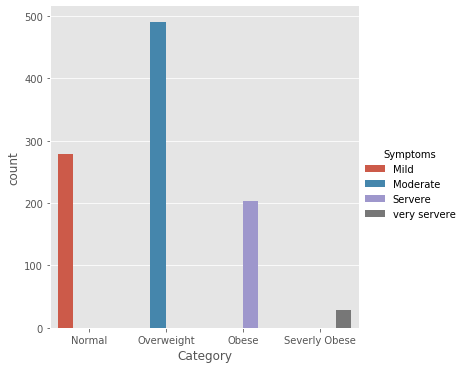

In [37]:
# Plotting categorical parameters
# https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="Category", hue="Symptoms", kind="count", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f948e506290>,
      dtype=object)

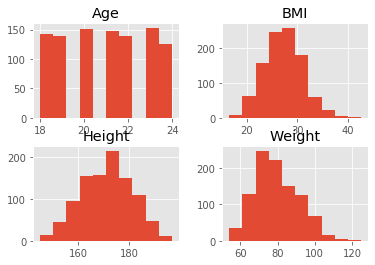

In [38]:
df.hist()

In [116]:

# https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy

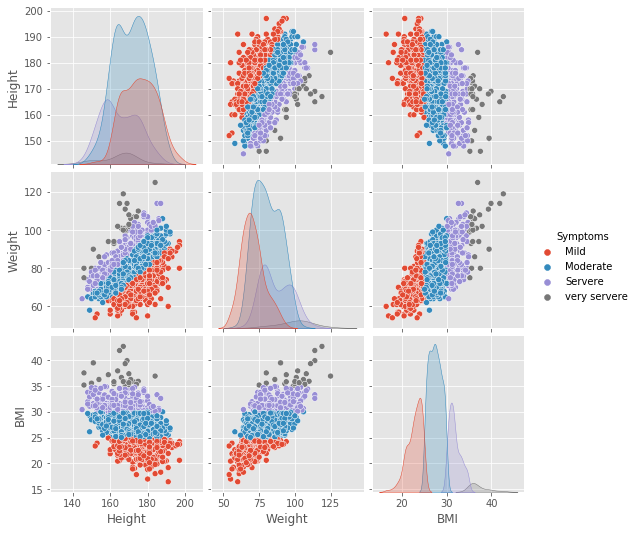

In [46]:
sns.pairplot(df2, hue ='Symptoms')

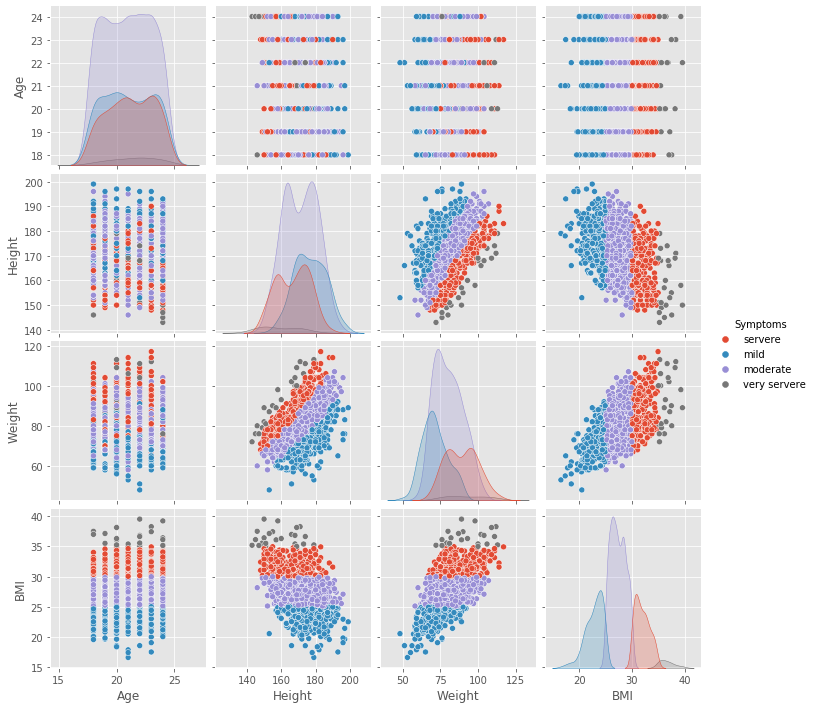

In [33]:
sns.pairplot(df, hue ='Symptoms')
# age parameter is making the data look strange because it is not continuous

In [70]:
sns.heatmap(df1)

ValueError: could not convert string to float: 'Mild'

In [50]:
import sklearn. neighbors as nei

In [53]:
# create my inputs and outputs
inputs = df[['Age','Height','Weight']]
outputs = df[['Symptoms']]

In [54]:
inputs.head(3)

,Age,Height,Weight
0,19,181,81
1,19,173,72
2,23,166,81


In [57]:
# https://scikit-learn.org/stable/modules/neighbors.html#classification
# set the amount of nearest neighbours to 4
knn = nei.KNeighborsClassifier(n_neighbors = 4)

In [58]:
knn.fit(inputs,outputs)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [59]:
df.loc[0]

Age              19
Sex            male
Height          181
Weight           81
BMI         24.7245
Symptoms       Mild
Category     Normal
Name: 0, dtype: object

In [62]:
knn.predict([[19,181,81]])

array(['Mild'], dtype=object)

In [65]:
def symptoms(age,height,weight):
    knn.predict([[age,height,weight]])
    return knn.predict

In [67]:
symptoms('19', '181', '81')

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


<bound method KNeighborsClassifier.predict of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')>

### <u>Sex<u>

In [7]:
df = df[['ID', 'Age', 'Sex', 'Height']]

In [10]:
pd.melt(df, id_vars=['ID'], value_vars=['Age'], value_vars=['Sex'], value_vars=['Height'])

SyntaxError: keyword argument repeated (<ipython-input-10-978c5906d23d>, line 1)

In [6]:
df['Age'] = pd.Series(age)

***

## Rough Work 


Now that we have created an age and sex parameter we can use them to create a dataframe and append the remaining parameters as they are dependent on age and sex. 

In [52]:
#df[['Age','Sex','Height','Weight','BMI','Category','Symptoms']]
df['Height'] = 0

for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Height"][i]=rng.normal(179,7)
    else:
        df["Height"][i]=rng.normal(165,7.6)

df['Weight'] = 0

for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Weight"][i]=rng.normal(89,10)
    else:
        df["Weight"][i]=rng.normal(73,7.10)

df['BMI'] = df['Weight']/(((df['Height'])/100)**2)

df['Category'] = 0

for i in range(len(df)):
    if df["BMI"][i]<=25:
        df["Category"][i]= 'Normal'
    elif df["BMI"][i]<=30:
        df["Category"][i]= 'Overweight'
    elif df["BMI"][i]<=35:
        df["Category"][i]= 'Obese'
    elif df["BMI"][i]>35:
        df["Category"][i]= 'Severly Obese'

df['Symptoms'] = 0        
       
for i in range(len(df)):
    if df["Category"][i]=='Normal':
        df["Symptoms"][i] = 'Mild'
    elif df["Category"][i] =='Overweight':
        df["Symptoms"][i] = 'Moderate'
    elif df["Category"][i] =='Obese':
        df["Symptoms"][i] = 'Servere'
    elif df["Category"][i] =='':
        df["Symptoms"][i] = 'Severly Obese'

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/Shane/opt/anaconda3/lib/python

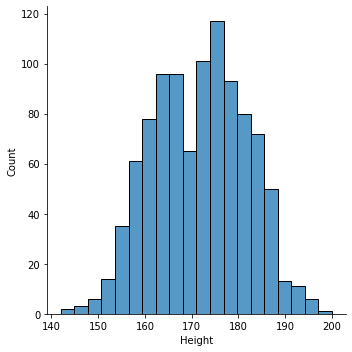

In [19]:
height = df['Height']
sns.displot(height)

In [9]:
s = ['male', 'female']
sex = rng.choice(s, 1000, p=[0.5, 0.5]).reshape(1000,1)

In [77]:
# To create my dataframe I need to initialize a list containing my parameters  
#parameters = [age] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(age, columns = ['Age']) 
  
# print dataframe. 

In [11]:
df['Sex'] = rng.choice(s, 1000, p=[0.5, 0.5]).reshape(1000,1)

In [13]:
df['Height']= 0

In [14]:
for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Height"][i]=rng.normal(172,8)
    else:
        df["Height"][i]=rng.normal(172,8)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f966f8109d0>,
      dtype=object)

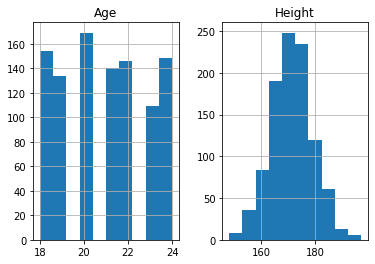

In [16]:
df.hist()

In [136]:
#df['Height']= height

In [137]:
#df['Weight']= rng.normal(72,20)

In [138]:
#df['BMI'] = df['Height']/df['Weight']

In [117]:
df["Height"]=0

for i in range(len(df)):
    if df["Sex"][i]=="male":
        df["Height"][i]=rng.normal(172,8,1000)
    else:
        df["Height"][i]=rng.normal(172,8,1000)

/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Shane/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ValueError: setting an array element with a sequence.

In [16]:
# sns.displot(df, x = "Age", y = "Height", hue="Sex", discrete=True)

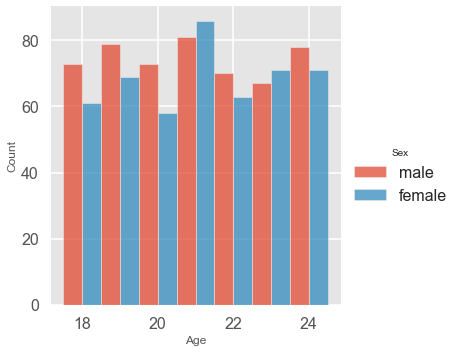

In [61]:
plt.rcParams["figure.figsize"] = (15,8)
#sns.displot(df, x = "Age", hue="Sex", discrete=True, kde=True)
sns.displot(df, x = "Age", hue="Sex", discrete=True, multiple="dodge")

## Height 

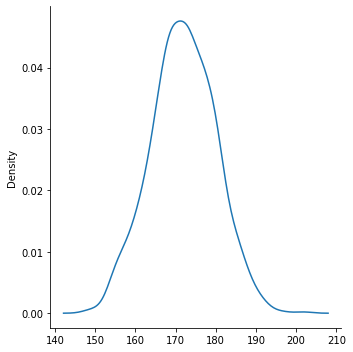

In [101]:
sns.displot(height, kind="kde")

In [106]:
df = pd.concat(df, height)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

## References

[1] https://mrmjournal.biomedcentral.com/articles/10.1186/s40248-016-0066-z#:~:text=Obesity%20causes%20mechanical%20compression%20of,and%20reduces%20respiratory%20muscle%20strength.

[2] https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2

[3] https://www.pnas.org/content/117/36/22035

[4] https://www.nature.com/articles/s41598-020-73777-8

https://hselibrary.ie/what-is-the-risk-of-a-person-with-obesity-contracting-covid-19-compared-to-someone-without-obesity-what-is-the-risk-of-a-person-with-obesity-developing-severe-illness-from-covid-19-how-is-severe-ill/

https://onlinelibrary.wiley.com/doi/full/10.1002/oby.22818?campaign=wolacceptedarticle&fbclid=IwAR1HR33IgvVlKadWx0pohO1A64g21vKRq8SFLRNvnoFhR5UsQQiIYNyyaTQ

https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus

Other Reference:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

[] https://en.wikipedia.org/wiki/Average_human_height_by_country#Table_of_heights (height)

[] https://econ-papers.upf.edu/papers/1002.pdf (s.d of height)

### Issue

- I tried first to pass np.arrays into the df directly. Found it is best to create pd.series first
- Trouble converting Sex in a categorical varialbe which I could assign to hue in seaborn
- Cannot use Sex for hue as it is a wide-form data
- Difficulty with the comparison operators for symptom fior loop
- ID column caused issues with the pairplot, need to remove it
- too many variables for pairplot need to specifiy with variables to take

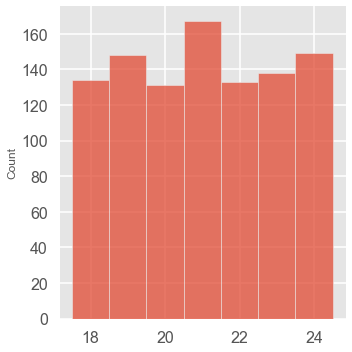

In [67]:
sns.displot(age, discrete=True)

In [3]:
# covert the age parameter into pandas series so we can easily investigate it 
age = pd.Series(age,name='Age')
age.describe()

count    1000.000000
mean       20.991000
std         2.006725
min        18.000000
25%        19.000000
50%        21.000000
75%        23.000000
max        24.000000
Name: Age, dtype: float64

In [6]:
df['Age'] = pd.Series(age)

In [ ]:
v

In [5]:
#df = pd.DataFrame()

In [6]:
#df['Age'] = pd.Series(age)

Obesity contributes to multiple systemic complications and directly causes the mechanical impairment of vital organs as a result of the accumulation of fatty tissue around these organs.

Obesity also significantly interferes with respiratory function by decreasing lung volume, particularly the expiratory reserve volume and functional residual capacity. Because of the ineffectiveness of the respiratory muscles, strength and resistance may be reduced. All these factors lead to inspiratory overload, which increases respiratory effort, oxygen consumption, and respiratory energy expenditure. It is noteworthy that patterns of body fat distribution significantly influence the function of the respiratory system, likely via the direct mechanical effect of fat accumulation in the chest and abdominal regions. Weight loss caused by various types of treatment, including low-calorie diet, intragastric balloon, and bariatric surgery, significantly improves lung function and metabolic syndrome and reduces body mass index. [1]

Given the impact obesity has on the respiratory system it is relevenant to investigate the correlation between obesity and susceptability to serve symptoms of Covid-19. Covid 19 is a respiratiory illness caused by the SARS-CoV-2 ( Severe acute respiratory syndrome coronavirus 2) strain of the coronavirus. [2]

An explanation for the reason why mortality rates were higher in Italy than China 

The first step is to import all the necessary libraries and declare our global variable, which shall be our sample size. We shall proceed with a sample size of 1000 people as any smaller will be too small to derive any meaningful relationship between the servity of Covid-19 and obesity.

https://knoema.com/atlas/Ireland/Male-obesity-prevalence